In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle # For rectangles
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
from scipy import stats # For linregress (trends)
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '../../../') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
u.check_virtual_memory()

3.8.2 | packaged by conda-forge | (default, Feb 28 2020, 17:15:22) 
[GCC 7.3.0]
Virtual memory usage - total: 252 GB / available: 200 GB / percent used: 20.4 %


# Check model data

In [31]:
root_CM7 = '/thredds/tgcc/store/p86caub/ICOLMDZOR/PROD/highresSST-present/CM7A-HR-v1.11.highresSST-present'

folder_CM7 = 'ATM'
var_CM7_ta = 'ta'
var_CM7_ps = 'psol'

path_CM7_ta = root_CM7+'/'+folder_CM7+'/Analyse/TS_MO/'+\
    'CM7A-HR-v1.11.highresSST-present_19500101_20141231_1M_'+var_CM7_ta+'.nc'

path_CM7_ps = root_CM7+'/'+folder_CM7+'/Analyse/TS_MO/'+\
    'CM7A-HR-v1.11.highresSST-present_19500101_20141231_1M_'+var_CM7_ps+'.nc'

In [26]:
root_CM6 = '/bdd/CMIP6/HighResMIP/IPSL/IPSL-CM6A-ATM-HR/highresSST-present/r1i1p1f1'

var_CM6_ta = 'ta'
var_CM6_ps = 'ps'
table_CM6 = 'Amon'

path_CM6_ta = root_CM6+'/'+table_CM6+'/'+var_CM6_ta+'/gr/latest/'\
    +var_CM6_ta+'_'+table_CM6+'_IPSL-CM6A-ATM-HR_highresSST-present_r1i1p1f1_gr_195001-201412.nc'

path_CM6_ps = root_CM6+'/'+table_CM6+'/'+var_CM6_ps+'/gr/latest/'\
    +var_CM6_ps+'_'+table_CM6+'_IPSL-CM6A-ATM-HR_highresSST-present_r1i1p1f1_gr_195001-201412.nc'

In [27]:
xr.open_dataset(path_CM7_ta)

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, lat: 360, lon: 720, plev: 17, time_counter: 780)
Coordinates:
  * lat                   (lat) float32 -90.0 -89.498604 ... 89.498604 90.0
  * lon                   (lon) float32 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
  * plev                  (plev) float32 100000.0 92500.0 ... 2000.0 1000.0
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 1950-01-16T12:00:00 ... 2014-12-16T12:00:00
Dimensions without coordinates: axis_nbounds
Data variables:
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    ta                    (time_counter, plev, lat, lon) float32 ...
Attributes:
    name:         histmthNMC
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2020-Jan-24 08:51:21 GMT
    uuid:         0ad2c610-3b43-4165-9f3e-0e3924307449
    LongName:     IPSLCM6.1.11-LR

In [28]:
xr.open_dataset(path_CM6_ta)

<xarray.Dataset>
Dimensions:      (axis_nbounds: 2, lat: 361, lon: 512, plev: 19, time: 780)
Coordinates:
  * lat          (lat) float32 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon          (lon) float32 0.0 0.703125 1.40625 ... 358.59375 359.29688
  * plev         (plev) float32 100000.0 92500.0 85000.0 ... 1000.0 500.0 100.0
  * time         (time) datetime64[ns] 1950-01-16T12:00:00 ... 2014-12-16T12:00:00
Dimensions without coordinates: axis_nbounds
Data variables:
    time_bounds  (time, axis_nbounds) datetime64[ns] ...
    ta           (time, plev, lat, lon) float32 ...
Attributes:
    name:                  /ccc/work/cont003/gencmip6/p86ghatt/IGCM_OUT/LMDZO...
    Conventions:           CF-1.7 CMIP-6.2
    creation_date:         2018-09-20T11:34:00Z
    tracking_id:           hdl:21.14100/3a84eba6-eac0-4f92-bcc3-610baf54a262
    description:           Forced global atmosphere-land simulations using da...
    title:                 IPSL-CM6A-ATM-HR model output prepared for CMIP6 /...
    activity_id:           HighResMIP
    contact:               ipsl-cmip6@listes.ipsl.fr
    data_specs_version:    01.00.21
    dr2xml_version:        1.12
    experiment_id:         highresSST-present
    experiment:            forced atmosphere experiment for 1950-2014
    external_variables:    areacella
    forcing_index:         1
    frequency:             mon
    further_info_url:      https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-CM6...
    grid:                  LMDZ grid
    grid_label:            gr
    nominal_resolution:    50 km
    initialization_index:  1
    institution_id:        IPSL
    institution:           Institut Pierre Simon Laplace, Paris 75252, France
    license:               CMIP6 model data produced by IPSL is licensed unde...
    mip_era:               CMIP6
    physics_index:         1
    product:               model-output
    realization_index:     1
    realm:                 atmos
    source:                IPSL-CM6A-ATM-HR (2018):  atmos: LMDZ (NPv6, N256;...
    source_id:             IPSL-CM6A-ATM-HR
    source_type:           AGCM
    sub_experiment_id:     none
    sub_experiment:        none
    table_id:              Amon
    variable_id:           ta
    variant_label:         r1i1p1f1
    EXPID:                 highresSST-present
    CMIP6_CV_version:      cv=6.2.3.5-2-g63b123e
    dr2xml_md5sum:         523ab9c7b70cfe3bc2c825d1e555e1d0
    model_version:         6.1.5
    branch_method:         no parent
    parent_activity_id:    no parent
    parent_experiment_id:  no parent
    parent_mip_era:        no parent
    parent_source_id:      no parent
    parent_time_units:     no parent
    history:               Wed Oct 24 15:24:38 2018: ncatted -O -a parent_var...
    NCO:                   "4.6.0"
    parent_variant_label:  no parent

### Check temperatures

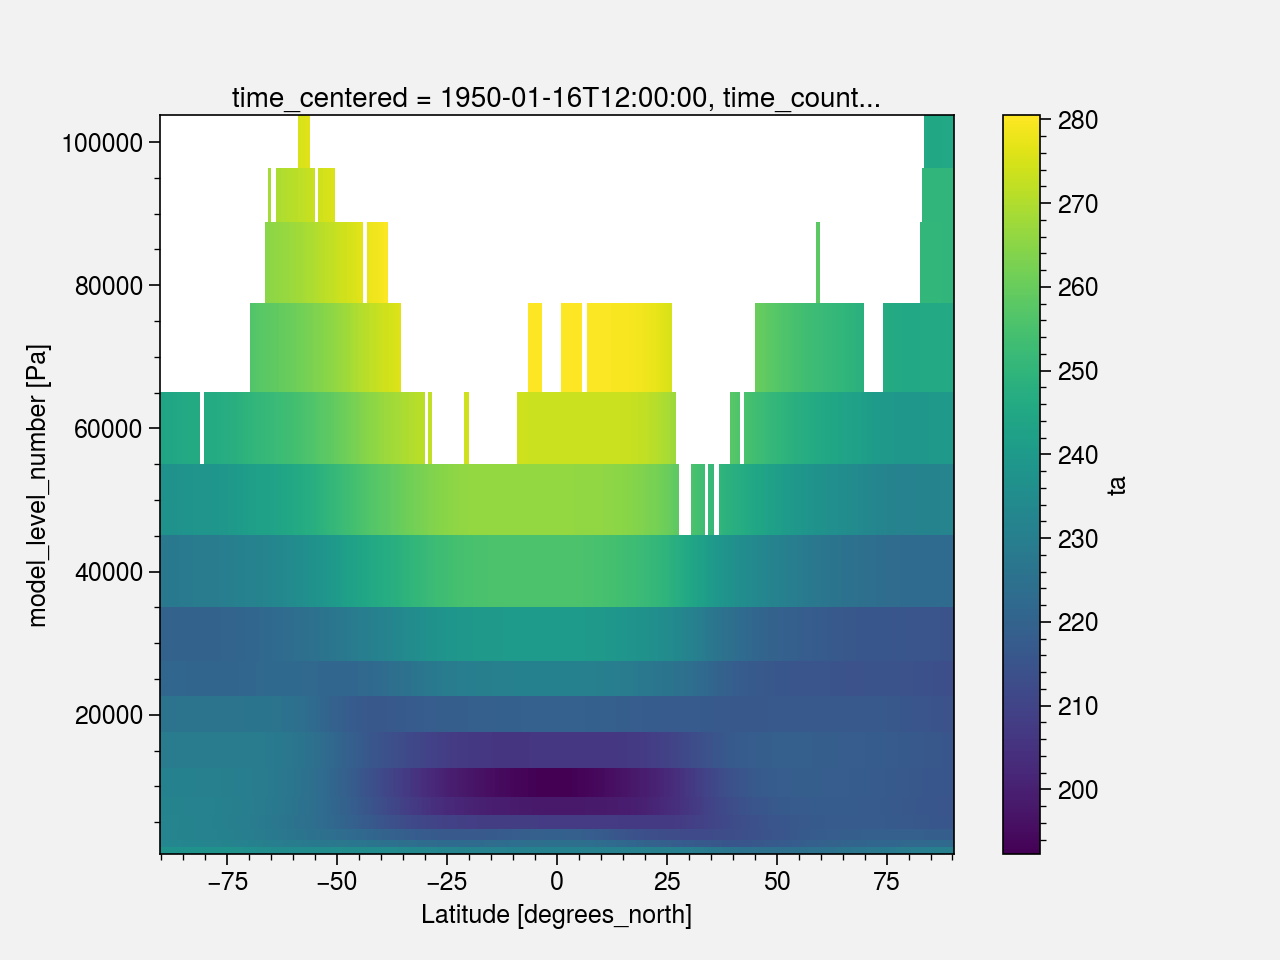

In [29]:
xr.open_dataset(path_CM7_ta)[var_CM7_ta].isel(time_counter=0).mean('lon', skipna=False).plot()

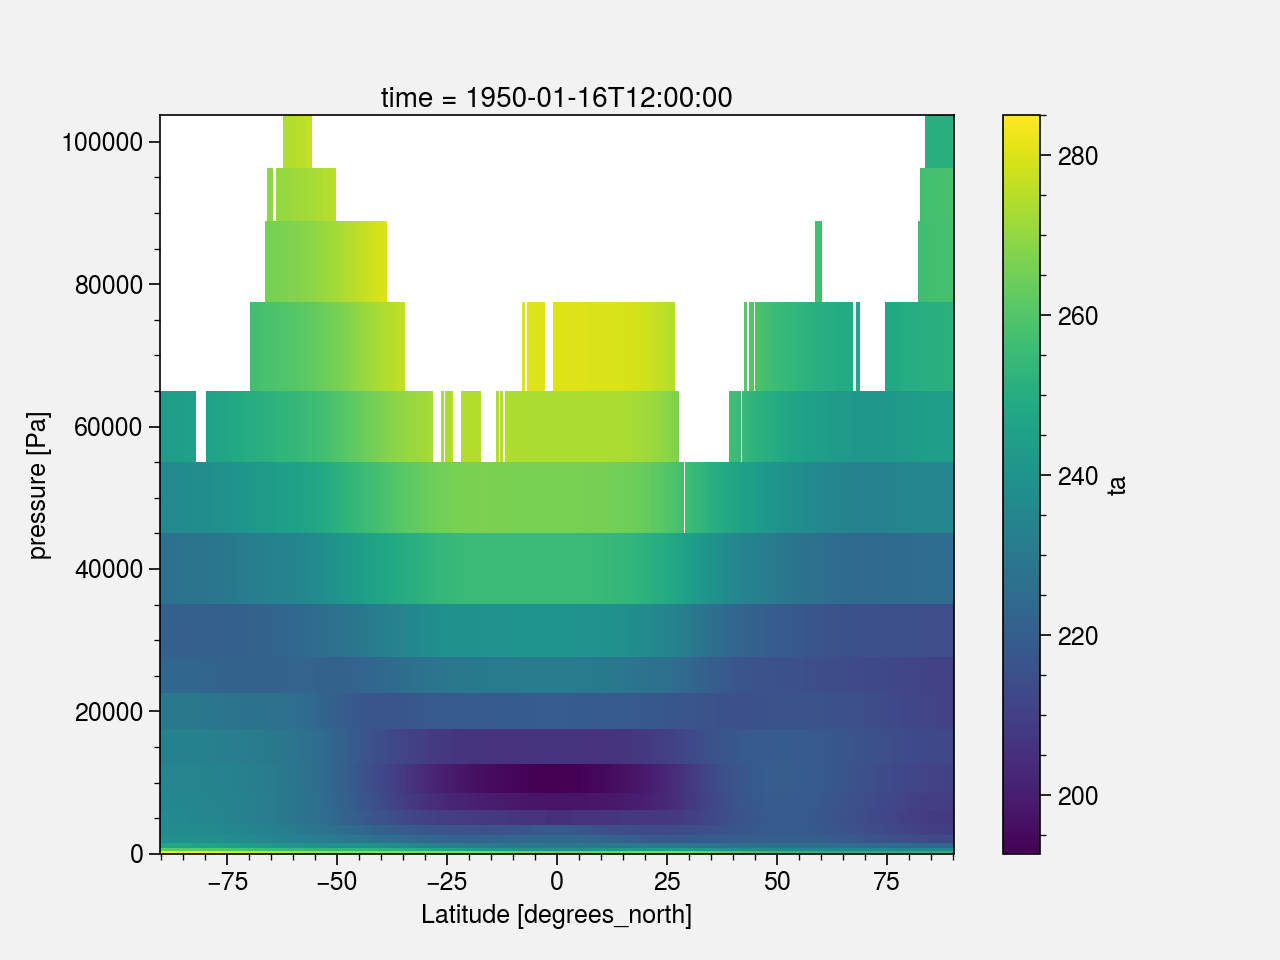

In [30]:
xr.open_dataset(path_CM6_ta)[var_CM6_ta].isel(time=0).mean('lon', skipna=False).plot()

### Check surface pressures

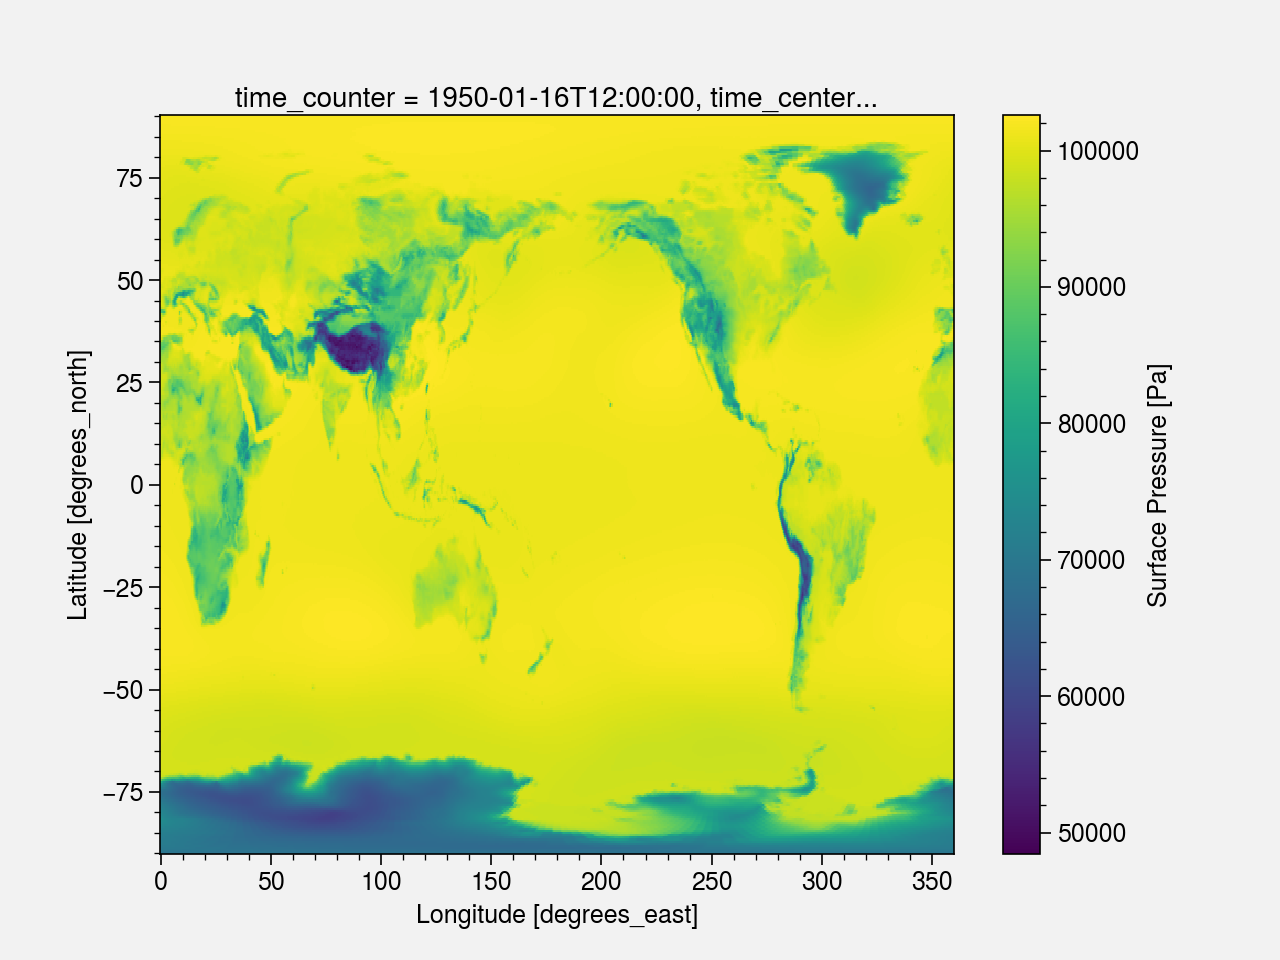

In [32]:
xr.open_dataset(path_CM7_ps)[var_CM7_ps].isel(time_counter=0).plot()

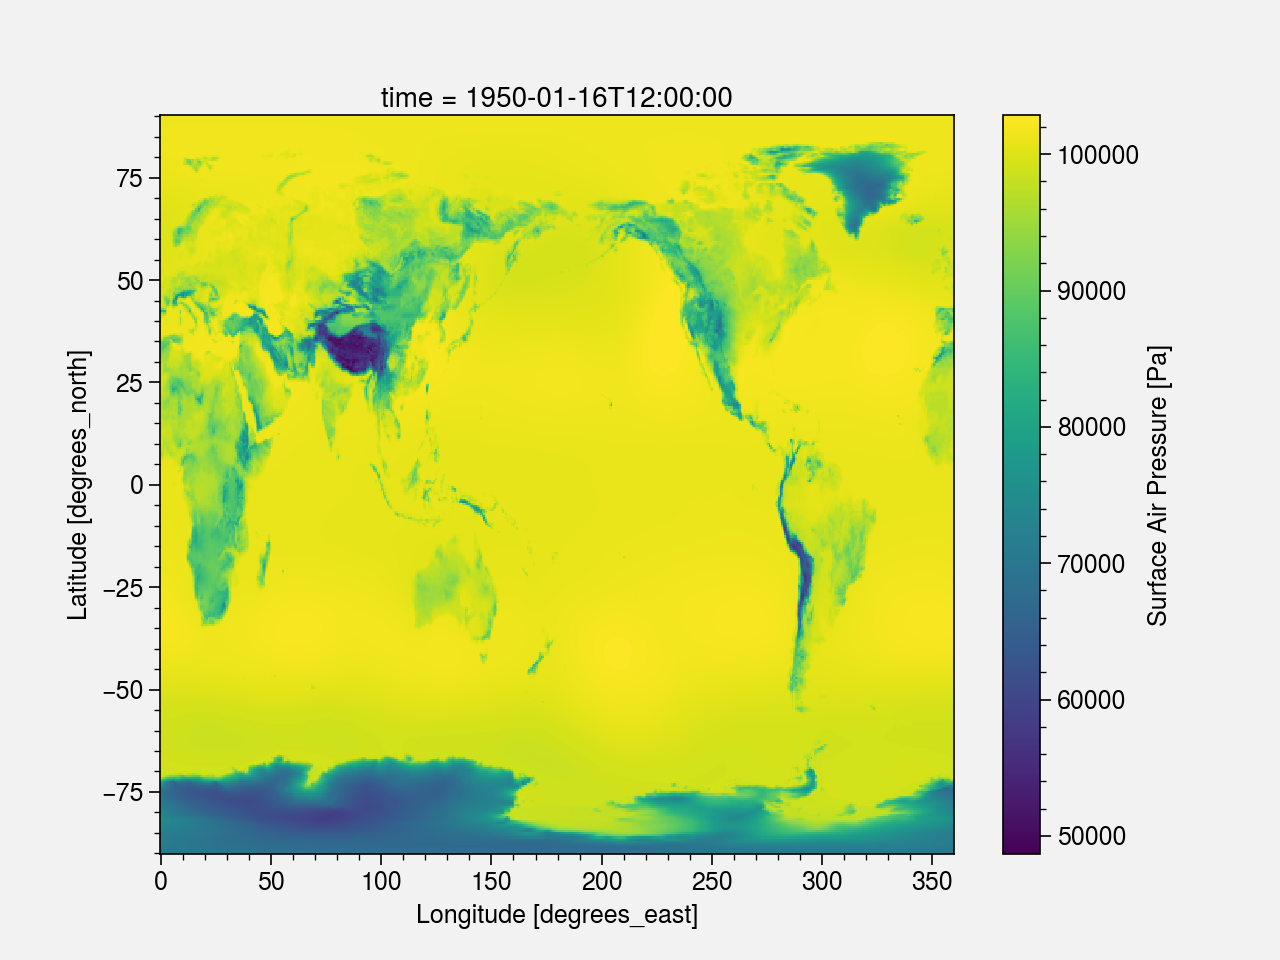

In [33]:
xr.open_dataset(path_CM6_ps)[var_CM6_ps].isel(time=0).plot()

# Define period and zone

In [35]:
# Define common period
period = slice('1981','2014')

# Define zone
latlim=(10,50)
lonlim=(60,110)

# Get model data

In [36]:
model_CM7_clim = xr.open_dataset(path_CM7_ta)[var_CM7_ta].sel(time_counter=period).mean('time_counter', skipna=False) - 273.15
model_CM7_clim.attrs['units'] = '°C'
model_CM7_clim

<xarray.DataArray 'ta' (plev: 17, lat: 360, lon: 720)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-15.017395, -15.017426, -15.017426, ..., -15.017426,
         -15.017426, -15.017426],
        [-15.028046, -15.028046, -15.028046, ..., -15.028046,
         -15.028046, -15.028046],
        [-15.002899, -15.002899, -15.002899, ..., -15.002899,
         -15.002899, -15.002899]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-12.825653, -12.825653, -12.825684, ..., -12.825745,
         -12.825684, -12.825653],
        [-12.863892, -12.863892, -12.863892, ..., -12.863892,
         -12.863892, -12.863892],
        [-12.893982, -12.893982, -12.893982, ..., -12.893982,
         -12.893982, -12.893982]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-13.485931, -13.485931, -13.485931, ..., -13.485962,
         -13.485931, -13.485931],
        [-13.521637, -13.521637, -13.521637, ..., -13.521637,
         -13.521637, -13.521637],
        [-13.549438, -13.549438, -13.549438, ..., -13.549438,
         -13.549438, -13.549438]],

       ...,

       [[-52.53282 , -52.53282 , -52.53282 , ..., -52.53282 ,
         -52.53282 , -52.53282 ],
        [-52.57733 , -52.576523, -52.57646 , ..., -52.577805,
         -52.57785 , -52.57785 ],
        [-52.620773, -52.6196  , -52.61943 , ..., -52.62181 ,
         -52.62181 , -52.621902],
        ...,
        [-50.57007 , -50.570053, -50.570007, ..., -50.570007,
         -50.570007, -50.570053],
        [-50.511932, -50.511932, -50.511932, ..., -50.511932,
         -50.511932, -50.511932],
        [-50.44423 , -50.44423 , -50.44423 , ..., -50.44423 ,
         -50.44423 , -50.44423 ]],

       [[-48.00627 , -48.00627 , -48.00627 , ..., -48.00627 ,
         -48.00627 , -48.00627 ],
        [-48.035675, -48.03424 , -48.034164, ..., -48.03679 ,
         -48.036804, -48.036835],
        [-48.067657, -48.065308, -48.065033, ..., -48.069748,
         -48.06978 , -48.06978 ],
        ...,
        [-49.69861 , -49.69861 , -49.69861 , ..., -49.69861 ,
         -49.69861 , -49.69861 ],
        [-49.649475, -49.649475, -49.649475, ..., -49.649475,
         -49.649475, -49.649475],
        [-49.5925  , -49.5925  , -49.5925  , ..., -49.5925  ,
         -49.5925  , -49.5925  ]],

       [[-38.70508 , -38.70508 , -38.70508 , ..., -38.70508 ,
         -38.70508 , -38.70508 ],
        [-38.709213, -38.70723 , -38.707138, ..., -38.71129 ,
         -38.711243, -38.711212],
        [-38.723022, -38.71942 , -38.719162, ..., -38.726913,
         -38.726837, -38.726517],
        ...,
        [-45.03662 , -45.03662 , -45.03659 , ..., -45.03659 ,
         -45.03659 , -45.03662 ],
        [-45.017654, -45.017654, -45.017685, ..., -45.017685,
         -45.017685, -45.017654],
        [-44.994583, -44.994583, -44.994583, ..., -44.994583,
         -44.994583, -44.994583]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -90.0 -89.498604 -88.997215 ... 89.498604 90.0
  * lon      (lon) float32 0.0 0.5 1.0 1.5 2.0 ... 357.5 358.0 358.5 359.0 359.5
  * plev     (plev) float32 100000.0 92500.0 85000.0 ... 3000.0 2000.0 1000.0
Attributes:
    units:    °C

In [37]:
model_CM6_clim = xr.open_dataset(path_CM6_ta)[var_CM6_ta].sel(time=period).mean('time', skipna=False) - 273.15
model_CM6_clim.attrs['units'] = '°C'
model_CM6_clim

<xarray.DataArray 'ta' (plev: 19, lat: 361, lon: 512)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-14.8194275, -14.81723  , -14.8151245, ..., -14.824158 ,
         -14.823151 , -14.820007 ],
        [-14.899719 , -14.899445 , -14.898285 , ..., -14.903107 ,
         -14.90155  , -14.901306 ],
        [-14.893799 , -14.893799 , -14.893799 , ..., -14.893799 ,
         -14.893799 , -14.893799 ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-12.292389 , -12.291595 , -12.29068  , ..., -12.295258 ,
         -12.294464 , -12.293518 ],
        [-12.354675 , -12.354523 , -12.35379  , ..., -12.356537 ,
         -12.355804 , -12.355408 ],
        [-12.333252 , -12.333252 , -12.333252 , ..., -12.333252 ,
         -12.333252 , -12.333252 ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-13.111664 , -13.11084  , -13.110199 , ..., -13.114532 ,
         -13.113647 , -13.112671 ],
        [-13.171082 , -13.170532 , -13.1701355, ..., -13.172546 ,
         -13.172058 , -13.171478 ],
        [-13.158112 , -13.158112 , -13.158112 , ..., -13.158112 ,
         -13.158112 , -13.158112 ]],

       ...,

       [[-45.327972 , -45.327972 , -45.327972 , ..., -45.327972 ,
         -45.327972 , -45.327972 ],
        [-45.375595 , -45.375153 , -45.3748   , ..., -45.376617 ,
         -45.376343 , -45.3759   ],
        [-45.40001  , -45.399002 , -45.39818  , ..., -45.40262  ,
         -45.4019   , -45.40088  ],
        ...,
        [-45.169968 , -45.169373 , -45.168716 , ..., -45.171722 ,
         -45.17119  , -45.170547 ],
        [-45.102417 , -45.102127 , -45.101837 , ..., -45.103256 ,
         -45.102997 , -45.102722 ],
        [-44.921707 , -44.921707 , -44.921707 , ..., -44.921707 ,
         -44.921707 , -44.921707 ]],

       [[-31.424759 , -31.424759 , -31.424759 , ..., -31.424759 ,
         -31.424759 , -31.424759 ],
        [-31.435242 , -31.434845 , -31.434341 , ..., -31.436264 ,
         -31.435974 , -31.435577 ],
        [-31.444336 , -31.44339  , -31.442505 , ..., -31.447113 ,
         -31.446335 , -31.445343 ],
        ...,
        [-34.76239  , -34.761017 , -34.759583 , ..., -34.766678 ,
         -34.76538  , -34.763885 ],
        [-34.758392 , -34.757584 , -34.756805 , ..., -34.760696 ,
         -34.759842 , -34.75917  ],
        [-34.805923 , -34.805923 , -34.805923 , ..., -34.805923 ,
         -34.805923 , -34.805923 ]],

       [[ -6.9555664,  -6.9555664,  -6.9555664, ...,  -6.9555664,
          -6.9555664,  -6.9555664],
        [ -6.889557 ,  -6.8891296,  -6.888977 , ...,  -6.890564 ,
          -6.8902893,  -6.88974  ],
        [ -6.8608704,  -6.8599854,  -6.859436 , ...,  -6.863037 ,
          -6.862488 ,  -6.8614197],
        ...,
        [-13.5477295, -13.546051 , -13.544525 , ..., -13.55249  ,
         -13.550903 , -13.549316 ],
        [-13.647064 , -13.646301 , -13.645508 , ..., -13.649445 ,
         -13.64859  , -13.647888 ],
        [-13.889893 , -13.889893 , -13.889893 , ..., -13.889893 ,
         -13.889893 , -13.889893 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float32 0.0 0.703125 1.40625 ... 358.59375

# Load min surface pressure for mask

In [38]:
ps_model_CM7_min = xr.open_dataset(path_CM7_ps)[var_CM7_ps].sel(time_counter=period).min('time_counter')
ps_model_CM6_min = xr.open_dataset(path_CM6_ps)[var_CM6_ps].sel(time=period).min('time')

model_CM6_clim_masked = model_CM6_clim.where(model_CM6_clim.plev <= ps_model_CM6_min)

In [41]:
 # Regrid CM7 towards CM6 lower horizontal resolution
regridder = xe.Regridder(model_CM7_clim, model_CM6_clim, 'bilinear', periodic=True, reuse_weights=True)
model_CM7_clim_regrid = regridder(model_CM7_clim)
ps_model_CM7_min_regrid = regridder(ps_model_CM7_min)

# Mask vertical values > ps
model_CM7_clim_regrid_masked = model_CM7_clim_regrid.where(
    model_CM7_clim_regrid.plev <= ps_model_CM7_min_regrid
)

# Regrid vertical
model_CM7_clim_regrid_masked_v = model_CM7_clim_regrid_masked.interp(
    plev=(model_CM6_clim.plev.values), method='linear'
).load()

Reuse existing file: bilinear_360x720_361x512_peri.nc


# Load obs
## ERA-Interim

See: http://localhost:7227/notebooks/notebooks/CICLAD/Himalaya/CMIP6_IPSL_bias/ta-global.ipynb

In [42]:
obs_longname = 'ERA-Interim'
obs_name = 'ERA-Interim'

# hPa level: 37
obs = xr.open_mfdataset(
    '/bdd/ERAI/NETCDF/GLOBAL_075/1xmonthly/AN_PL/*/ta.*.apmei.GLOBAL_075.nc',
    combine='by_coords', parallel=True
).ta.sel(time=period) - 273.15

obs_clim = u.clim(obs, calendar='gregorian')

# Pa
ps_obs_min = xr.open_mfdataset(
    "/data/mlalande/ERAI/sp/sp_ERAI_*.nc",combine='by_coords', parallel=True
).sp.sel(time=period).min('time')

 # Regrid towards model
regridder = xe.Regridder(obs_clim, model_CM6_clim, 'bilinear', periodic=True, reuse_weights=True)
obs_clim_regrid = regridder(obs_clim)
ps_obs_min_regrid = regridder(ps_obs_min)

# Mask vertical values > ps
obs_clim_regrid_masked = obs_clim_regrid.where(obs_clim_regrid.level <= ps_obs_min_regrid/100)

# Regrid vertical
obs_clim_regrid_masked_v = obs_clim_regrid_masked.interp(level=(model_CM6_clim.plev.values/100), method='linear').load()

Reuse existing file: bilinear_241x480_361x512_peri.nc


# Plot differences

In [45]:
bias_global = []
clim_global = []

bias_HMA = []
clim_HMA = []

bias_global_without_HMA = []
clim_global_without_HMA = []


# CM6
bias_global.append( (model_CM6_clim_masked - obs_clim_regrid_masked_v.values).mean('lon', skipna=False).persist() )
clim_global.append( model_CM6_clim_masked.mean('lon', skipna=False).persist() )

bias_HMA.append( (model_CM6_clim_masked - obs_clim_regrid_masked_v.values).sel(lon=slice(lonlim[0],lonlim[1])).mean('lon', skipna=False).persist() )
clim_HMA.append( model_CM6_clim_masked.sel(lon=slice(lonlim[0],lonlim[1])).mean('lon', skipna=False).persist() )

bias_global_without_HMA.append( (model_CM6_clim_masked - obs_clim_regrid_masked_v.values).where((model_CM6_clim_masked.lon < lonlim[0]) | (model_CM6_clim_masked.lon > lonlim[1]), drop=True).mean('lon', skipna=False).persist() )
clim_global_without_HMA.append( model_CM6_clim_masked.where((model_CM6_clim_masked.lon < lonlim[0]) | (model_CM6_clim_masked.lon > lonlim[1]), drop=True).mean('lon', skipna=False).persist() )

# # CM7
bias_global.append( (model_CM7_clim_regrid_masked_v - obs_clim_regrid_masked_v.values).mean('lon', skipna=False).persist() )
clim_global.append( model_CM7_clim_regrid_masked_v.mean('lon', skipna=False).persist() )

bias_HMA.append( (model_CM7_clim_regrid_masked_v - obs_clim_regrid_masked_v.values).sel(lon=slice(lonlim[0],lonlim[1])).mean('lon', skipna=False).persist() )
clim_HMA.append( model_CM7_clim_regrid_masked_v.sel(lon=slice(lonlim[0],lonlim[1])).mean('lon', skipna=False).persist() )

bias_global_without_HMA.append( (model_CM7_clim_regrid_masked_v - obs_clim_regrid_masked_v.values).where((model_CM6_clim_masked.lon < lonlim[0]) | (model_CM6_clim_masked.lon > lonlim[1]), drop=True).mean('lon', skipna=False).persist() )
clim_global_without_HMA.append( model_CM7_clim_regrid_masked_v.where((model_CM6_clim_masked.lon < lonlim[0]) | (model_CM6_clim_masked.lon > lonlim[1]), drop=True).mean('lon', skipna=False).persist() )

# Difference
bias_global.append( bias_global[1] - bias_global[0] )
clim_global.append( clim_global[1] - clim_global[0] )

bias_HMA.append( bias_HMA[1] - bias_HMA[0] )
clim_HMA.append( clim_HMA[1] - clim_HMA[0] )

bias_global_without_HMA.append( bias_global_without_HMA[1] - bias_global_without_HMA[0] )
clim_global_without_HMA.append( clim_global_without_HMA[1] - clim_global_without_HMA[0] )


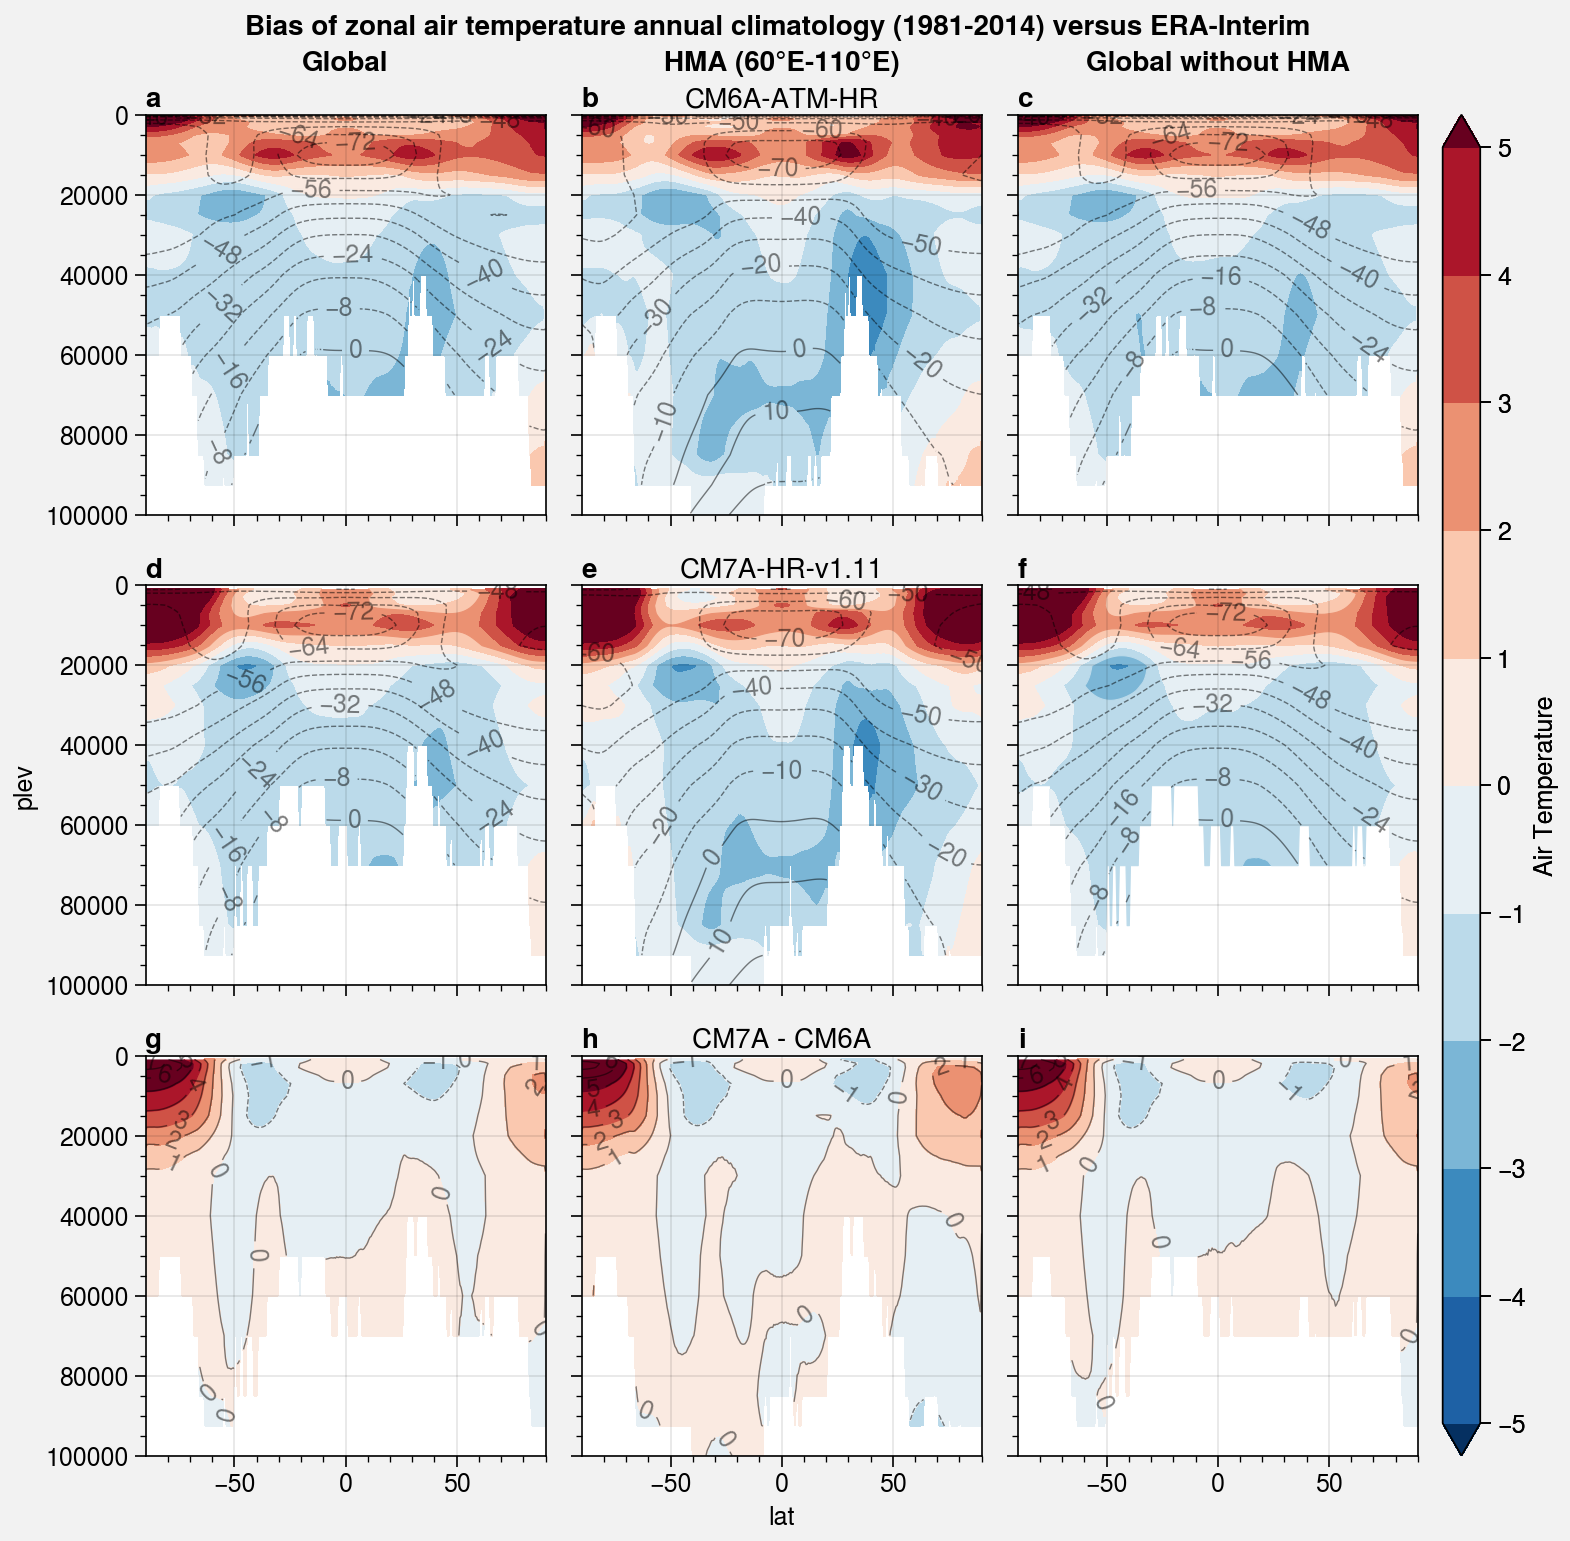

In [48]:
var = 'ta'
label = 'Air Temperature'
units = '°C'
cmap = 'BuRd'
levels = plot.arange(-5,5,1)
extend = 'both'

ncols=3
lw=0.5
alpha=0.5
ylim=(100000,0)

f, axs = plot.subplots(ncols=ncols, nrows=3, axwidth=2)

list_models = ['CM6A-ATM-HR', 'CM7A-HR-v1.11', 'CM7A - CM6A']

k=0
for i in range(0,3):
    # Model
    axs[k].contourf(bias_global[i], cmap=cmap, levels=levels, extend=extend)
    axs[k].contour(clim_global[i], color='black', labels=True, lw=lw, alpha=alpha)
    axs[k].format(ylim=ylim, title='')
    k += 1

    # ERA-Interim
    axs[k].contourf(bias_HMA[i], cmap=cmap, levels=levels, extend=extend)
    axs[k].contour(clim_HMA[i], color='black', labels=True, lw=lw, alpha=alpha)
    axs[k].format(ylim=ylim, title=list_models[i])
    k += 1

    # Bias
    m = axs[k].contourf(bias_global_without_HMA[i], cmap=cmap, levels=levels, extend=extend)
    axs[k].contour(clim_global_without_HMA[i], color='black', labels=True, lw=lw, alpha=alpha)
    axs[k].format(ylim=ylim, title='')
    k += 1
    
    
f.colorbar(m, label=label, loc='r')   


axs.format(
    suptitle="Bias of zonal air temperature annual climatology ("+period.start+"-"+period.stop+") versus ERA-Interim ",
    collabels=['Global', 'HMA (60°E-110°E)', 'Global without HMA'],
#     rowlabels=list_models,
    abc = True
)

f.save('img/'+var+'_zonal_dynamico_'+period.start+'-'+period.stop+'.png')
f.save('img/'+var+'_zonal_dynamico_'+period.start+'-'+period.stop+'.pdf')